In [123]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-dataset/customer_dataset_cleaned.csv
/kaggle/input/cleanedfinal/cleanedFinal.csv


In [124]:
# df = pd.read_csv('/kaggle/input/cleaned-dataset/customer_dataset_cleaned.csv');
df = pd.read_csv('/kaggle/input/cleanedfinal/cleanedFinal.csv');

df.head()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.84
1,2,176875.0,15.74,33.83
2,4,38542.0,7.82,10.73
3,5,48712.0,7.51,10.04
4,6,172333.0,14.16,35.06


check whether its cleaned

In [125]:
df.dtypes

customer_id                          int64
average_monthly_spend              float64
average_monthly_visit_frequency    float64
average_monthly_basket_size        float64
dtype: object

In [126]:
print(df.isnull().sum())

customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
dtype: int64


scaling

In [127]:
selected_columns = ['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']
data = df[selected_columns]


In [128]:
df.dtypes

customer_id                          int64
average_monthly_spend              float64
average_monthly_visit_frequency    float64
average_monthly_basket_size        float64
dtype: object

finding the number of clusters

In [129]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



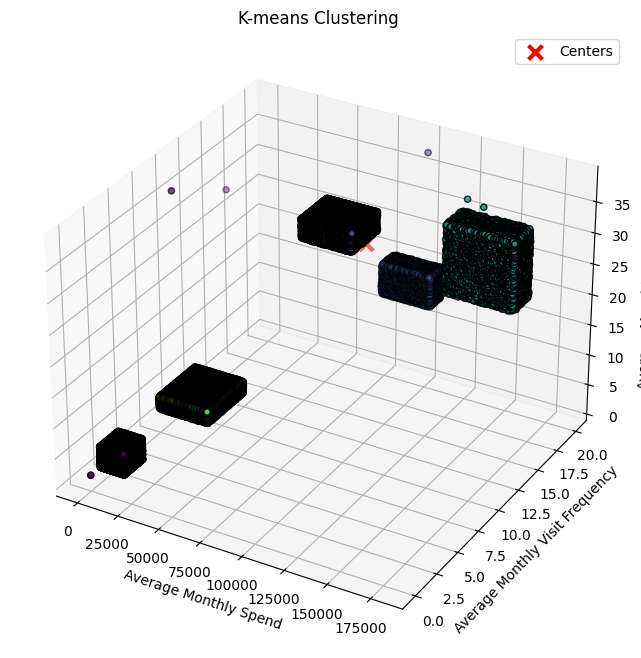

In [135]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data['average_monthly_spend'], data['average_monthly_visit_frequency'], data['average_monthly_basket_size'], c=labels, cmap='viridis', marker='o', edgecolor='k')
# Plot the cluster centers
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='x', s=100, linewidths=3, label='Centers')

ax.set_title('K-means Clustering')
ax.set_xlabel('Average Monthly Spend')
ax.set_ylabel('Average Monthly Visit Frequency')
ax.set_zlabel('Average Monthly Basket Size')
plt.legend()
plt.show()

In [139]:
df["cluster"] = labels
data1 = df[df.cluster==0]
data2 = df[df.cluster==1]
data3 = df[df.cluster==2]
data4 = df[df.cluster==3]
data5 = df[df.cluster==4]

In [140]:
data1.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,189982.000000,189982.000000,189982.000000,189982.000000,189982.0
mean,280400.833884,7493.494194,1.994726,3.032638,0.0
std,161740.059801,4331.253678,0.577796,1.100530,0.0
min,1.000000,0.000000,0.000000,1.560000,0.0
25%,140494.000000,3744.000000,1.500000,1.990000,0.0
50%,280430.500000,7488.000000,1.990000,2.990000,0.0
75%,420892.750000,11246.000000,2.490000,3.990000,0.0
max,560000.000000,14999.000000,15.350000,36.420000,0.0


In [141]:
data2.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,104384.000000,104384.000000,104384.000000,104384.000000,104384.0
mean,280655.820700,94961.561312,13.679246,29.961842,1.0
std,161771.328465,8662.542359,4.274816,9.502620,0.0
min,9.000000,80000.000000,9.000000,15.000000,1.0
25%,140305.500000,87484.000000,10.180000,18.440000,1.0
50%,280690.000000,94941.000000,11.350000,36.060000,1.0
75%,420730.500000,102470.000000,18.960000,37.990000,1.0
max,559995.000000,109999.000000,19.990000,37.990000,1.0


In [142]:
data2.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,104384.000000,104384.000000,104384.000000,104384.000000,104384.0
mean,280655.820700,94961.561312,13.679246,29.961842,1.0
std,161771.328465,8662.542359,4.274816,9.502620,0.0
min,9.000000,80000.000000,9.000000,15.000000,1.0
25%,140305.500000,87484.000000,10.180000,18.440000,1.0
50%,280690.000000,94941.000000,11.350000,36.060000,1.0
75%,420730.500000,102470.000000,18.960000,37.990000,1.0
max,559995.000000,109999.000000,19.990000,37.990000,1.0


In [143]:
data3.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,47494.000000,47494.000000,47494.000000,47494.000000,47494.0
mean,279152.984061,159895.463322,14.994027,30.483575,2.0
std,161991.013031,11475.779209,0.577099,3.175372,0.0
min,2.000000,140000.000000,14.000000,25.000000,2.0
25%,139195.500000,150042.000000,14.490000,27.740000,2.0
50%,277298.500000,159853.000000,15.000000,30.480000,2.0
75%,420442.500000,169712.750000,15.490000,33.230000,2.0
max,559968.000000,179998.000000,15.990000,37.990000,2.0


In [144]:
data4.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,95168.000000,95168.000000,95168.000000,95168.000000,95168.0
mean,279302.282332,42501.691367,5.997189,9.993590,3.0
std,161500.496673,4328.511677,1.153417,0.576425,0.0
min,4.000000,34969.000000,4.000000,9.000000,3.0
25%,139180.000000,38769.000000,5.000000,9.490000,3.0
50%,279176.500000,42493.000000,6.000000,9.990000,3.0
75%,418570.250000,46265.250000,7.000000,10.490000,3.0
max,559996.000000,49999.000000,7.990000,10.990000,3.0


In [145]:
data5.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,94949.000000,94949.000000,94949.000000,94949.000000,94949.0
mean,279922.007783,27488.478194,5.995261,9.993957,4.0
std,161529.791013,4310.962602,1.152733,0.577710,0.0
min,20.000000,20000.000000,4.000000,9.000000,4.0
25%,139380.000000,23773.000000,5.000000,9.490000,4.0
50%,281106.000000,27499.000000,6.000000,9.990000,4.0
75%,419576.000000,31193.000000,6.990000,10.490000,4.0
max,559998.000000,34968.000000,7.990000,10.990000,4.0


average_monthly_spend
data1-> 0-14999
data2-> 80000-109999
data3-> 140000-179998
data4-> 34969-49999
data5-> 20000-34968

In [154]:
import pandas as pd

# Define the average monthly spend data ranges
ranges = [0, 14999, 80000,109999, 140000, 179998,4969,49999,20000,34968]

# Define the labels for the percentile ranges
labels = ['data1', 'data2', 'data3', 'data4', 'data5','data6','data7','data8','data9','data10']

# Define the minimum and maximum values
min_value = 0
max_value = 179998

# Calculate the percentile step
percentile_step = (max_value - min_value) / 100

# Calculate the percentiles for each range
percentiles = [int((range_value - min_value) / percentile_step) for range_value in ranges]

# Create a dictionary mapping ranges to percentiles
range_percentile_map = dict(zip(labels, percentiles))

# Print the range and corresponding percentile values
for label, percentile in range_percentile_map.items():
    print(f"{label}: {percentile}%")


data1: 0%
data5: 2%
data4: 100%
data2: 61%
data3: 77%
data6: 27%
data7: 11%
data8: 19%


average_monthly_visit data1-> 0-14999 data2-> 80000-109999 data3-> 140000-179998 data4-> 34969-49999 data5-> 20000-34968

In [159]:
import pandas as pd

# Define the average monthly spend data ranges
ranges = [0, 14999, 80000,109999, 140000, 179998,4969,49999,20000,34968]

# Define the labels for the percentile ranges
labels = ['data1', 'data2', 'data3', 'data4', 'data5','data6','data7','data8','data9','data10']

# Define the minimum and maximum values
min_value = 0
max_value = 179998

# Calculate the percentile step
percentile_step = (max_value - min_value) / 100

# Calculate the percentiles for each range
percentiles = [int((range_value - min_value) / percentile_step) for range_value in ranges]

# Create a dictionary mapping ranges to percentiles
range_percentile_map = dict(zip(labels, percentiles))

# Print the range and corresponding percentile values
for label, percentile in range_percentile_map.items():
    print(f"{label}: {percentile}%")


data1: 0%
data2: 8%
data3: 44%
data4: 61%
data5: 77%
data6: 100%
data7: 2%
data8: 27%
data9: 11%
data10: 19%


average_monthly_basket data1-> 0-14999 data2-> 80000-109999 data3-> 140000-179998 data4-> 34969-49999 data5-> 20000-34968

In [ ]:
import pandas as pd

# Define the average monthly spend data ranges
ranges = [0, 14999, 80000,109999, 140000, 179998,4969,49999,20000,34968]

# Define the labels for the percentile ranges
labels = ['data1', 'data2', 'data3', 'data4', 'data5','data6','data7','data8','data9','data10']

# Define the minimum and maximum values
min_value = 0
max_value = 179998

# Calculate the percentile step
percentile_step = (max_value - min_value) / 100

# Calculate the percentiles for each range
percentiles = [int((range_value - min_value) / percentile_step) for range_value in ranges]

# Create a dictionary mapping ranges to percentiles
range_percentile_map = dict(zip(labels, percentiles))

# Print the range and corresponding percentile values
for label, percentile in range_percentile_map.items():
    print(f"{label}: {percentile}%")

In [148]:
df.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,531977.000000,531977.000000,531977.000000,531977.000000,531977.000000
mean,280057.473458,48094.139869,6.878055,13.255191,1.625394
std,161688.570591,47506.452801,5.287824,11.897811,1.541823
min,1.000000,0.000000,0.000000,1.560000,0.000000
25%,139926.000000,10499.000000,2.390000,3.800000,0.000000
50%,280106.000000,31959.000000,5.600000,9.790000,1.000000
75%,420170.000000,85417.000000,9.850000,17.480000,3.000000
max,560000.000000,179998.000000,19.990000,37.990000,4.000000


In [158]:
import pandas as pd

# Define the percentile ranges for each category
percentile_ranges = {
    'High end - Premium': {'Monthly spend': (0, 14999), 'Monthly visit frequency': (80000, 109999), 'Monthly basket size': (80000, 109999)},
    'High end - Loyal': {'Monthly spend': (80000, 109999), 'Monthly visit frequency': (0, 49999), 'Monthly basket size': (140000, 179998)},
    'High end - Frequent': {'Monthly spend': (80000, 109999), 'Monthly visit frequency': (80000, 109999), 'Monthly basket size': (34969, 49999)},
    'Medium level': {'Monthly spend': (34969, 49999), 'Monthly visit frequency': (34969, 49999), 'Monthly basket size': (34969, 49999)},
    'Low level': {'Monthly spend': (20000, 34968), 'Monthly visit frequency': (0, 49999), 'Monthly basket size': (0, 49999)}
}

def classify_customer(row):
    for category, ranges in percentile_ranges.items():
        if (ranges['Monthly spend'][0] <= row['average_monthly_spend'] <= ranges['Monthly spend'][1] and
            ranges['Monthly visit frequency'][0] <= row['average_monthly_visit_frequency'] <= ranges['Monthly visit frequency'][1] and
            ranges['Monthly basket size'][0] <= row['average_monthly_basket_size'] <= ranges['Monthly basket size'][1]):
            return category
    return 'Unclassified'

# Apply the function to each row in the DataFrame
df['Category'] = df.apply(classify_customer, axis=1)

# Classify the example customer
category = classify_customer(customer_data)
print(f"Category for the customer: {category}")


KeyError: 'average_monthly_spend'